In [151]:
from pathlib import Path

# Make the path object:
cache_path = Path('/tmp/cache')

# Just because we have made a cache path object doesn't mean that the directory
# we made exists; here we check if it exists and make the directory if not.
if not cache_path.exists():
    cache_path.mkdir()


In [152]:
from utilities import ls, crawl
import nibabel as nib

In [153]:
from cloudpathlib import S3Path, S3Client

client = S3Client(
    local_cache_dir=cache_path,
    no_sign_request=True)

hbn_base_path = S3Path(
    "s3://fcp-indi/",
    client=client)

In [154]:
base_path = Path('/home/jovyan/shared')
qsi_path = base_path / 'diffusion_group_data' / 'results' / 'derivatives' / 'qsiprep'
print(qsi_path.exists())

True


In [155]:
# Quickly look if BIDSified
print(qsi_path)
for sub in sub_code: 
    sub_path = qsi_path / f'{sub}'
    crawl(sub_path)

/home/jovyan/shared/diffusion_group_data/results/derivatives/qsiprep
sub-NDARAA948VFH
   anat
      sub-NDARAA948VFH_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5
      sub-NDARAA948VFH_from-MNI152NLin2009cAsym_to-T1w_mode-image_xfm.h5
      sub-NDARAA948VFH_from-T1wNative_to-T1wACPC_mode-image_xfm.mat
      sub-NDARAA948VFH_from-T1wACPC_to-T1wNative_mode-image_xfm.mat
      sub-NDARAA948VFH_dseg.nii.gz
      sub-NDARAA948VFH_desc-brain_mask.nii.gz
      sub-NDARAA948VFH_desc-aseg_dseg.nii.gz
      sub-NDARAA948VFH_desc-preproc_T1w.nii.gz
   ses-HBNsiteRU
      anat
         sub-NDARAA948VFH_ses-HBNsiteRU_acq-HCP_from-orig_to-T1w_mode-image_xfm.txt
      dwi
         sub-NDARAA948VFH_ses-HBNsiteRU_acq-64dir_space-T1w_desc-eddy_cnr.nii.gz
         sub-NDARAA948VFH_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_dwi.bval
         sub-NDARAA948VFH_ses-HBNsiteRU_acq-64dir_desc-SliceQC_dwi.json
         sub-NDARAA948VFH_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_dwi.nii.gz
         s

In [156]:
# Choose on sub to test
sub_code = ['sub-NDARAA948VFH', 'sub-NDARAB055BPR']
bids_sub_idx = 0 
bids_sub     = f'{sub_code[bids_sub_idx]}'
bids_sub


'sub-NDARAA948VFH'

In [158]:
# Set variables on your file names
bids_ses   = 'HBNsiteRU'
bids_acq   = '64dir'
bids_space = 'T1w'
bids_desc  = 'preproc'


In [161]:
# Load T1w volume
from dipy.io.image import load_nifti, save_nifti
# t1_fname = bids_path / bids_sub / f'ses-{bids_ses}' /'anat' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_anat}_T1w.nii.gz'
# t1_data, t1_affine, t1_nii    = load_nifti(t1_fname, return_img=True)

# Set DWI file names
# base_dwi_fname  = bids_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq_dwi}_dwi'
dwi_fname  = qsi_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq}_space-{bids_space}_desc-{bids_desc}_dwi.nii.gz'
                                                           # sub-NDARAA948VFH_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_dwi.bval
bval_fname = qsi_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq}_space-{bids_space}_desc-{bids_desc}_dwi.bval'
bvec_fname = qsi_path / bids_sub / f'ses-{bids_ses}' / 'dwi' / f'{bids_sub}_ses-{bids_ses}_acq-{bids_acq}_space-{bids_space}_desc-{bids_desc}_dwi.bvec'

# Load volume
from dipy.io.image import load_nifti, save_nifti
dwi_data, dwi_affine, dwi_nii = load_nifti(dwi_fname, return_img=True)
dwi_nii     = nib.load(dwi_fname)
dwi_data    = dwi_nii.get_fdata()
dwi_hdr     = dwi_nii.header
print('Volume loaded')

Volume loaded


In [162]:
# returns T1w data size &  dimensions of each voxel
print('T1w shape:')
print(t1_nii.shape)
print('voxel dimensions:')
print(t1_nii.header.get_zooms()[:3])

# returns dwi data size &  dimensions of each voxel
print('DWI shape:')
print(dwi_nii.shape)
print('voxel dimensions:')
print(dwi_nii.header.get_zooms()[:3])

T1w shape:
(224, 320, 320)
voxel dimensions:
(0.8000011, 0.8, 0.8)
DWI shape:
(89, 110, 95, 129)
voxel dimensions:
(1.8, 1.8, 1.8)


In [163]:
# get bvals and bvecs in a diffusion gradient table
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table

# get bvals and bvecs in a diffusion gradient table
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('Load gradient table')   
gtab = gradient_table(bvals, bvecs)

# Take  aquick look at the gradient table info & bvals
print('Gradients table info')
print(gtab.info)

# Show gradient table info & bvals
print('B-values')
print(gtab.bvals)
print('B-vectors')
print(gtab.bvecs[:10, :])

ValueError: String with full path to file is required

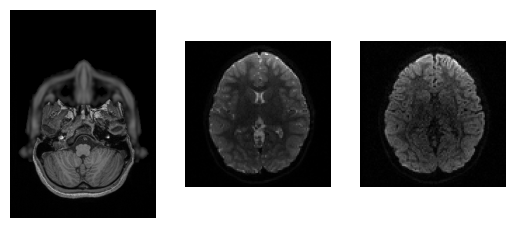

In [13]:
# quickly visualize the results
import matplotlib.pyplot as plt

sli = dwi_data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 3, 1).set_axis_off()                                  # plot volume in the left
plt.imshow(t1_data[:, :, 150].T, cmap ='gray', origin='lower')       # plot T1w sag view, slice 85 -roughly middline
plt.subplot(1, 3, 2).set_axis_off()     # plot volume in the middle
plt.imshow(dwi_data[:, :, sli, 0].T, cmap='gray', origin='lower')    # plot dMRI in axial view, slice 35 of volume 0 (b0)
plt.subplot(1, 3, 3).set_axis_off()     # plot volume in the right
plt.imshow(dwi_data[:, :, sli, 25].T, cmap='gray', origin='lower')   # plot dMRI in axial view, slice 35 of volume 24
plt.show()

In [14]:
#  Create the dwi and T1 masks
from dipy.segment.mask import median_otsu, multi_median

print('Getting dwi mask')
# Generates brian mask
dwi_data_masked, dwi_mask = median_otsu(dwi_data, vol_idx=range(10, 50),
                                        median_radius=3, numpass=2,
                                        autocrop=False, dilate=2)

Getting dwi mask


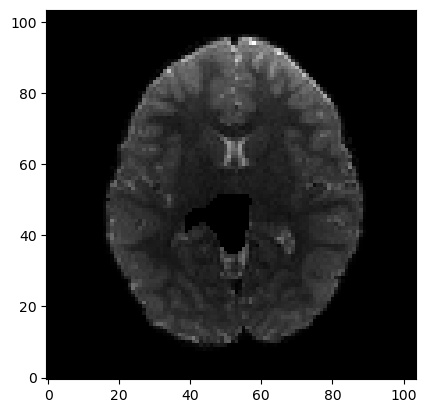

In [20]:
# quickly visualize the results to evaluate whether to adjust mask params (?)
sli = dwi_data_masked.shape[2] // 2
plt.subplot   # plot volume in the middle
plt.imshow(dwi_data_masked[:, :, sli, 0].T, cmap='gray', origin='lower')    # plot dMRI in axial view, slice 35 of volume 0 (b0)
plt.show()

In [ ]:
# Denoise
from dipy.denoise.patch2self import patch2self
print('Denoising')
dwi_data_den = patch2self(dwi_data_masked, bvals, model='ols', verbose=True,
                          shift_intensity=True,
                          clip_negative_vals=False,
                          b0_threshold=50)

In [19]:
# Now plot before and after to see the denoising
gra  = 24  # pick out a random volume for a particular gradient direction
orig = dwi_data_masked[:, :, sli, gra]
den  = dwi_data_den[:, :, sli, gra]


Text(0.5, 1.0, 'Residuals')

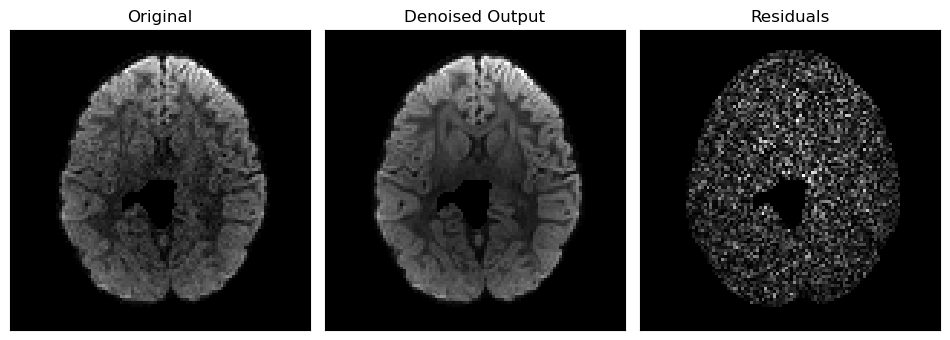

In [22]:
import numpy as np
# prepare to plot
fig1, ax = plt.subplots(1, 3, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)

# computes the residuals
rms_diff = np.sqrt((orig - den) ** 2)
# plot original, denoised, and residuals
ax.flat[0].imshow(orig.T, cmap='gray', interpolation='none', origin='lower')
ax.flat[0].set_title('Original')
ax.flat[1].imshow(den.T, cmap='gray', interpolation='none', origin='lower')
ax.flat[1].set_title('Denoised Output')
ax.flat[2].imshow(rms_diff.T, cmap='gray', interpolation='none', origin='lower')
ax.flat[2].set_title('Residuals')

In [23]:
# Now let's calculate fractional anisotropy to generate a rough WM mask
from dipy.io.utils import nifti1_symmat
from dipy.reconst.dti import (TensorModel, color_fa, fractional_anisotropy,
                              lower_triangular, geodesic_anisotropy,
                              mean_diffusivity, axial_diffusivity,
                              radial_diffusivity, lower_triangular)
from dipy.segment.tissue import TissueClassifierHMRF
tenmodel= TensorModel(gtab)
tenfit  = tenmodel.fit(dwi_data_den)


In [27]:
# Calculate FAs
FA      = fractional_anisotropy(tenfit.evals)
FA[np.isnan(FA)] = 0
FA      = np.clip(FA, 0, 1)

tensor_vals = lower_triangular(tenfit.quadratic_form)
ten_img     = nifti1_symmat(tensor_vals, affine=dwi_affine)

# Set output folder to save diffusivity measures
GA  = geodesic_anisotropy(tenfit.evals)

# compute
RGB = color_fa(FA, tenfit.evecs)
MD  = mean_diffusivity(tenfit.evals)
AD  = axial_diffusivity(tenfit.evals)
RD  = radial_diffusivity(tenfit.evals)

white_matter = FA > 0.12

In [29]:
# Apply the CsaOdfModel at voxel-level 
# Estimate fiber orientations for tracking
from dipy.direction import peaks
from dipy.reconst import shm

csa_model = shm.CsaOdfModel(gtab, 4) # Implement Constant Solid Angle ODF Model | Maximal spherical harmonic order=6
gfa_csd = csa_model.fit(dwi_data_den, mask = white_matter).gfa
print('gfa_csd.shape (%d, %d, %d)' % gfa_csd.shape)

csapeaks = peaks.peaks_from_model(model = csamodel,
                                  data  = dwi_data,
                                  sphere=peaks.default_sphere,
                                  relative_peak_threshold=.8,
                                  min_separation_angle=45,
                                  mask  =white_matter)


# We can also calculate ODFs (Orientation Distribution Function) using
# peaks_from_model can return the peaks and their indices, GFA which is
# similar to FA but for ODF based models.
csa_peaks = peaks_from_model(csa_model, dwi_data_den, default_sphere,
                             relative_peak_threshold=.5,
                             min_separation_angle=25,
                             mask=dwi_mask,
                             return_odf=False,
                             normalize_peaks=True)
gfa_peaks = csa_peaks.gfa
print('gfa_peaks.shape (%d, %d, %d)' % gfa_peaks.shape)


In [ ]:
# Now use EuDX to track all of the white matter
